<a href="https://colab.research.google.com/github/ddinesan/Manga/blob/master/Lecture_23_Worksheet_Random_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cirq

In [ ]:
import cirq
import numpy as np
import matplotlib

In [ ]:
# Here Evan defined a utility function to print circuits as described in Lecture 1
from cirq.contrib.svg import circuit_to_svg
from IPython.display import SVG, display
import os

def cprint(circuit):
  """Convert the cirq.Circuit to a temp svg and display + garbage collect."""
  with open("temp.svg", 'w+') as f:
    f.write(circuit_to_svg(circuit))
  display(SVG('temp.svg'))
  os.remove('temp.svg')

There are two ways to implement the random generator: by using a single qubit and repeating the circuit [log n(with base 2)] times and another by using [log n (with base 2)] qubits, where n is the range of an integer.

## Method 1

**Simulating the circuit using 1 qubit**

Suppose we want an integer in range [0,1024), so repetitions = 10 in this case

In [ ]:
# Creating a qubit
q0 = cirq.NamedQubit("q0")

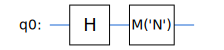

In [ ]:
# Defining the circuit
circuit = cirq.Circuit()
circuit.append([cirq.H(q0),cirq.measure(q0, key = 'N')])
cprint(circuit)

In [ ]:
## Defining the simulator
simulator = cirq.Simulator()

# Running the simulation 
result = simulator.run(circuit, repetitions=10)

## printing the result:
print(result)

N=0110001010


## Method 2

**Simulating the circuit using log n qubits**

In [ ]:
# Defining n qubits
n = 10
q = cirq.LineQubit.range(n)

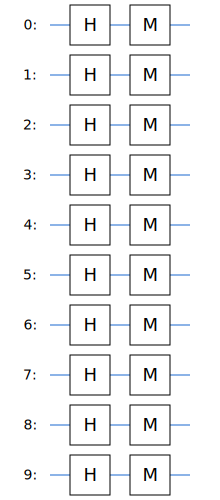

In [ ]:
## defining circuit
circuit = cirq.Circuit()


## adding operators
for i in range(n):
  circuit.append([cirq.H(q[i]),cirq.measure(q[i])])


cprint(circuit)

In [ ]:
## Defining the simulator
simulator = cirq.Simulator()

# Running the simulation 
result = simulator.run(circuit)

#print( list(result.histogram)[0])

## printing the result:
print(result)

0=0
1=0
2=1
3=1
4=0
5=0
6=0
7=0
8=1
9=0


In [ ]:
## Getting integers

In [ ]:
def random_bit():
  qubit = cirq.NamedQubit('q0')
  circuit = cirq.Circuit()
  circuit.append([cirq.H(q0),cirq.measure(q0, key = 'N')])


  simulator = cirq.Simulator()
  result = simulator.run(circuit)


  bit = list(result.histogram(key='N'))[0] ## Adding the index helps to get 
    #the actual bit instead of list of the single number
  return bit

In [ ]:
bit = random_bit()
print(bit)

0


In [ ]:
Integer = 0
bit_string = ''
for i in range(0,4):
    bit = random_bit()
    bit_string = str(bit) + bit_string ##stores the binary string
    ##print(bit)
    Integer = Integer + bit* (2**i) ## to convert the bit to integer

print(bit_string)
print(Integer)

0001
1


## What if the integer is not in range [0, $2^n$) ?

Suppose we want the no. in the range [0,10]

In [ ]:
def output():
    Integer = 0
    bit_string = ''
    for i in range(0,4):
        bit = random_bit()
        bit_string = str(bit) + bit_string ##stores the binary string
        ##print(bit)
        Integer = Integer + bit* (2**i) ## to convert the bit to integer

    print(bit_string)
    if(Integer > 10):
        output()
    else:   
        print(Integer)

In [ ]:
output()

1101
0011
3
